In [164]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')




In [165]:
# Carregando os dados, e parece que está delimitado por ";" e o valor decimal por ","
# A primeira linha parece ser um cabeçalho extra, logo foi pulada
data = pd.read_csv('C:/Users/calaz/Downloads/Validação v2.csv', encoding='ISO-8859-1', delimiter=';', decimal=',', skiprows=1)  


coluna_especifica = data['potencia_aparente_f2']

print("Samples:", data.shape[0])
print("Features:", data.shape[1])
print(r"potencia_ativa_f2")
data.head()


Samples: 257
Features: 36
potencia_ativa_f2


,Data,energia_ativa_f1,energia_ativa_f2,energia_ativa_f3,energia_ativa_total,energia_aparente_f1,energia_aparente_f2,energia_aparente_f3,energia_aparente_total,energia_reativa_f2,...,potencia_reativa_f2,potencia_reativa_f3,potencia_reativa_total,temperatura,tensao_f1_f2,tensao_f2_f3,tensao_f3_f1,angulo_tensao_f1,angulo_tensao_f2,angulo_tensao_f3
0,23/03/2022 10:59,0.005,0.001,0.001,0.007,0.006,0.005,0.003,0.014,0.004,...,711,-86,953,24,440.29,439.94,440.11,0.0,119.7,-120.1
1,23/03/2022 10:59,0.005,0.001,0.001,0.007,0.006,0.005,0.003,0.014,0.004,...,709,-89,950,24,440.11,439.77,439.94,0.0,119.7,-120.1
2,23/03/2022 10:58,0.005,0.001,0.001,0.007,0.006,0.005,0.003,0.014,0.004,...,700,-83,948,24,440.11,439.77,439.94,0.0,119.7,-120.0
3,23/03/2022 10:57,0.005,0.001,0.001,0.007,0.006,0.005,0.003,0.014,0.004,...,691,-86,950,24,439.59,439.07,439.59,0.0,119.7,-120.0
4,23/03/2022 10:56,0.005,0.001,0.001,0.007,0.006,0.005,0.003,0.014,0.004,...,685,-80,940,24,438.38,438.04,438.56,0.0,119.8,-119.9


In [166]:
#aqui eu verifico se há alguma coluna faltando dados ou se é um inteiro
data.isna().sum()
data.dtypes


Data                        object
energia_ativa_f1           float64
energia_ativa_f2           float64
energia_ativa_f3           float64
energia_ativa_total        float64
energia_aparente_f1        float64
energia_aparente_f2        float64
energia_aparente_f3        float64
energia_aparente_total     float64
energia_reativa_f2         float64
energia_reativa_f1         float64
energia_reativa_f3           int64
energia_reativa_total      float64
fator_potencia_f1          float64
fator_potencia_f2          float64
fator_potencia_f3          float64
Fator_Potencia_Total       float64
potencia_aparente_f1         int64
potencia_aparente_f2         int64
potencia_aparente_f3         int64
potencia_aparente_total      int64
potencia_ativa_f1            int64
potencia_ativa_f2            int64
potencia_ativa_f3            int64
potencia_ativa_total         int64
potencia_reativa_f1          int64
potencia_reativa_f2          int64
potencia_reativa_f3          int64
potencia_reativa_tot

<font color='red'>Algumas considerações:</font><br>
  A potência está setada em quilowatts (kW),<br>
                        A energia está setada  em quilowatts hora (kWh),<br>
                        A relação física entre potência e energia é E = P*dt,<br>

                        
<font color='red'>Aparente, Ativa e Reat:</font><br>
 **Potência ativa (Pat)** é o "trabalho" útil no circuito (kW), <br>
                        **Potência Reativa (Pre)** é a perda de "energia" para sistema indutivos,<br>
                        **Potência Aparente (Pap)** é potência total do circuito,<br>
                        A relação física entre elas é **Pap^2 = Pat^2 + Pre^2** ,<br>
                        ou **Pap = P*cos(theta)** e theta é o angulo de fase entre tensão e corrente,<br>


<font color='red'>Fator de potência:</font><br>
      É o fator que representa a eficiencia com que a pontência é convertida,<br>
                        **Cos(theta) = Pat/Pap** .<br>

Além disso, há o angulo de tensão entre as fases setados por f1.

Portanto, preciso verificar algumas informações importantes que são correlações.<br>
Tal como:**Potência Ativa** (P) = **Potência Aparente** (S) * **Fator de Potência** (cos φ)


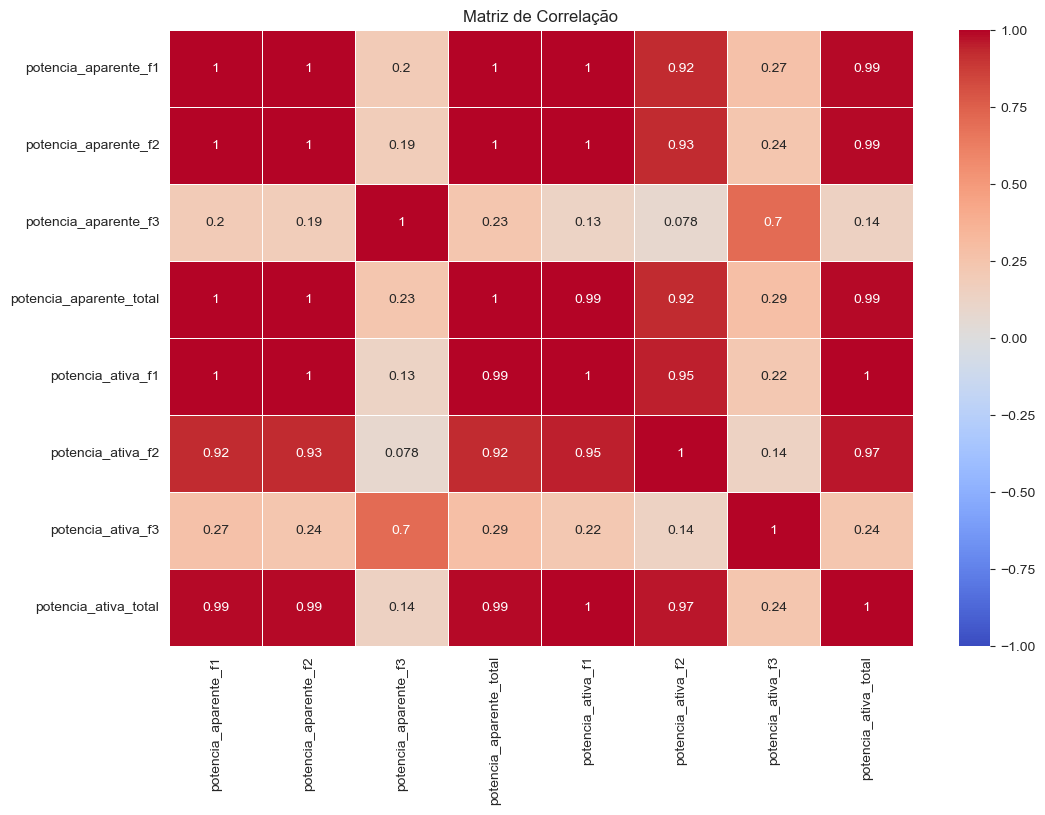

In [167]:

# Selecionando as colunas relevantes para a correlação
correlation_columns = ["potencia_aparente_f1", "potencia_aparente_f2", "potencia_aparente_f3", "potencia_aparente_total",
                       "potencia_ativa_f1", "potencia_ativa_f2", "potencia_ativa_f3", "potencia_ativa_total"]
correlation_data = data[correlation_columns]

# Calculando a matriz de correlação
correlation_matrix = correlation_data.corr()

# Plotando a matriz de correlação usando seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=.5)
plt.title("Matriz de Correlação")
plt.show()


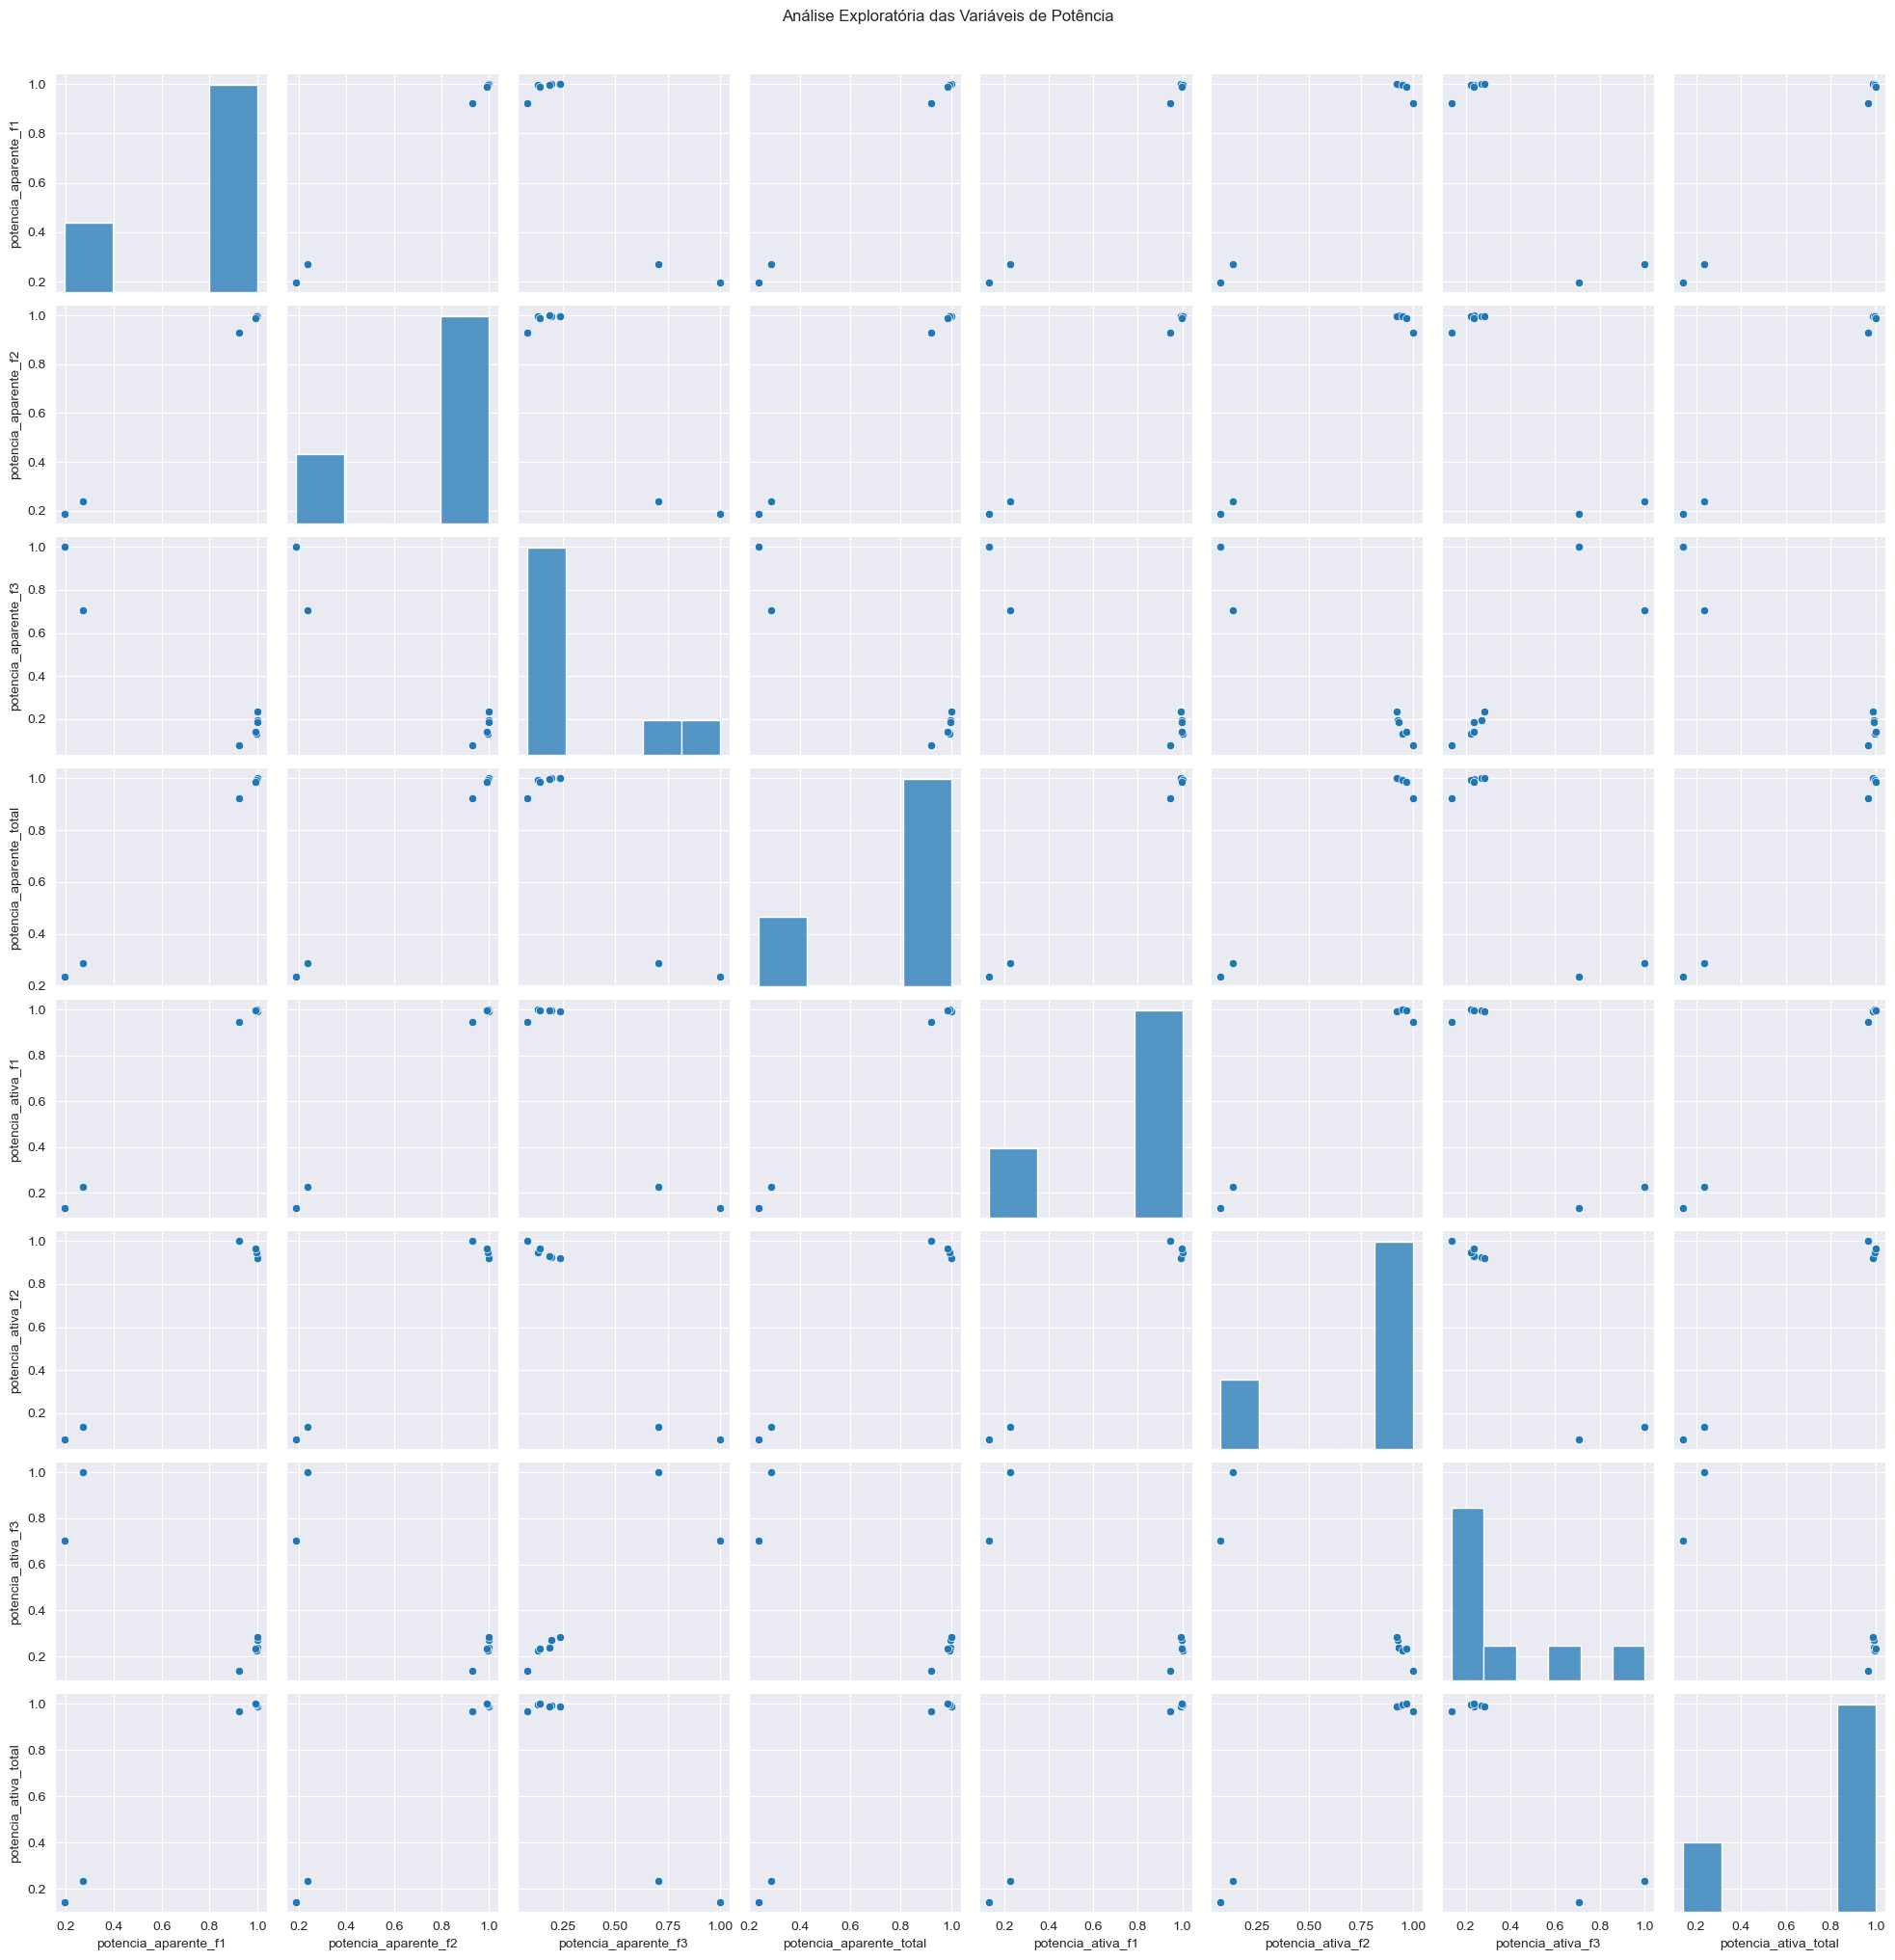

In [168]:
# Análise exploratória com pairplot
# Verificar qual a correlação entre as colunas relevantes
sns.pairplot(correlation_matrix)
plt.suptitle("Análise Exploratória das Variáveis de Potência", y=1.02)
plt.show()

Parece que neste ponto **temos um veridito**, de que há correlação entre a potencia ativa e a potencia aparente de cada fase e assim é possível treinar um modelo através do termo de correlação Fator de potência.<br>

Como agora eu tenho uma conexão entre as colunas, irei investigar os dados Input.

In [169]:
# Carregando os ddos do input obtidos pela Binahki
input_data = pd.read_csv('C:/Users/calaz/Downloads/Input v2 (1).csv', encoding='ISO-8859-1', delimiter=';', decimal=',')

# Check de dados padrão
print("Samples:", input_data.shape[0])
print("Features:", input_data.shape[1])
input_data.head()

Samples: 606
Features: 8


,DATA,corrente_neutro,corrente_f1,corrente_f2,corrente_f3,tensao_f1,tensao_f2,tensao_f3
0,23/03/2022 11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23/03/2022 10:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23/03/2022 10:59,9.53,4.16,3.35,2.02,254.2,254.0,254.1
3,23/03/2022 10:59,9.56,4.17,3.35,2.03,254.1,253.9,254.0
4,23/03/2022 10:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
#aqui eu verifico se há alguma coluna faltando dados ou se é um inteiro
input_data.isna().sum()


DATA                 0
corrente_neutro    381
corrente_f1        381
corrente_f2        381
corrente_f3        381
tensao_f1          381
tensao_f2          381
tensao_f3          381
dtype: int64

In [171]:
# Parece que há espaços sem informações, portanto:
input_data.dropna(inplace=True) 

# Mostrando as primeiras linhas do dataset
input_data.head()

,DATA,corrente_neutro,corrente_f1,corrente_f2,corrente_f3,tensao_f1,tensao_f2,tensao_f3
2,23/03/2022 10:59,9.53,4.16,3.35,2.02,254.2,254.0,254.1
3,23/03/2022 10:59,9.56,4.17,3.35,2.03,254.1,253.9,254.0
6,23/03/2022 10:58,9.45,4.12,3.31,2.02,254.1,253.9,254.0
8,23/03/2022 10:57,9.48,4.13,3.28,2.06,253.8,253.5,253.8
11,23/03/2022 10:56,9.38,4.08,3.27,2.02,253.1,252.9,253.2


Com os dados do arquivo input parece que há novas informações a serem investigadas, como a corrente neutra e as outras correntes.<br>
IObs =  &sum; Ij em que j é o numero de fase do sistema<br>
Potência Aparente (S) = &sum; Potapj em que j é o numero de fase do sistema <br>
Potência Ativa (P) = Potência Aparente (S) * Fator de Potência (cos φ), onde φ é o ângulo de fase entre a tensão e a corrente. <br>
Potência Reativa (Q) = Potência Aparente (S) *  (sen φ) <br>
Por fim, esta claro aqui que um modelo de treinamento por regressão linear é mais do que suficiente por conta da equação **P = S * FP**


In [172]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = data[["potencia_aparente_f1", "potencia_aparente_f2", "potencia_aparente_f3"]].values
y = data[["potencia_ativa_f1", "potencia_ativa_f2", "potencia_ativa_f3"]].values

# Dividindo os dados em conjuntos de treinamento e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [173]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = regressor.predict(X_test)

# Calculando o erro quadrático médio (MSE) e o coeficiente de determinação (R^2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R^2:", r2)


MSE: 529.7083744665456
R^2: 0.8008729228435177


Agora fica muito mais fácil de obter os valores almejados pela Binahki.. <br>
- Corrente Total; -> Ineutro = If1 + If2 + If3
- Potência Reativa Fase; -> Patv*(1-(Patv/Papr)^2)
- Potência Reativa Total; -> Pref1 + Pref2 + Pref3
- <font color='yellow'>**Potência Ativa Fase;  -> vai ser predito através da Potencia aparente**</font><br>
- Potência Ativa Total;  -> Patf1 + Patf2 + Patf3
- Fator de potência Fase; -> Patv/Papr
- Fator de potência Total; -> FPtotal = (&sum;(S x FP)) / (&sum;S para todas as cargas)
- Energia Ativa Total;
- Energia Reativa Total.


In [174]:
columns_to_convert_data = ["potencia_aparente_f1", "potencia_aparente_f2", "potencia_aparente_f3", "potencia_aparente_total", "potencia_ativa_total"]
columns_to_convert_input = ["corrente_neutro", "corrente_f1", "corrente_f2", "corrente_f3", "tensao_f1", "tensao_f2", "tensao_f3"]

for col in columns_to_convert_data:
    data[col] = pd.to_numeric(data[col], errors='coerce')

for col in columns_to_convert_input:
    input_data[col] = pd.to_numeric(input_data[col], errors='coerce')


In [175]:
Int = input_data["corrente_neutro"]
If1 = input_data["corrente_f1"] 
If2 = input_data["corrente_f2"]
If3 = input_data["corrente_f3"]
Tf1 = input_data["tensao_f1"]
Tf2 = input_data["tensao_f2"]
Tf3 = input_data["tensao_f3"]

In [176]:
# Corrigindo a referência e calculando a potência aparente novamente


input_data["potencia_aparente_f1"] = (If1) * Tf1
input_data["potencia_aparente_f2"] = (If2) * Tf2
input_data["potencia_aparente_f3"] = (If3) * Tf3

input_data.head()


,DATA,corrente_neutro,corrente_f1,corrente_f2,corrente_f3,tensao_f1,tensao_f2,tensao_f3,potencia_aparente_f1,potencia_aparente_f2,potencia_aparente_f3
2,23/03/2022 10:59,9.53,4.16,3.35,2.02,254.2,254.0,254.1,1057.472,850.900,513.282
3,23/03/2022 10:59,9.56,4.17,3.35,2.03,254.1,253.9,254.0,1059.597,850.565,515.620
6,23/03/2022 10:58,9.45,4.12,3.31,2.02,254.1,253.9,254.0,1046.892,840.409,513.080
8,23/03/2022 10:57,9.48,4.13,3.28,2.06,253.8,253.5,253.8,1048.194,831.480,522.828
11,23/03/2022 10:56,9.38,4.08,3.27,2.02,253.1,252.9,253.2,1032.648,826.983,511.464


In [177]:
# Preparando os dados para previsão
X_new = input_data[["potencia_aparente_f1", "potencia_aparente_f2", "potencia_aparente_f3"]]
X_new = X_new.copy()
X_new.dropna(inplace=True)

In [178]:
# Resetting the indices of input_data and predicted_df before concatenation
input_data_reset = input_data.reset_index(drop=True)
predicted_df_reset = predicted_df.reset_index(drop=True)

# Combining the reset datasets
combined_data_corrected = pd.concat([input_data_reset, predicted_df_reset], axis=1)

# Displaying the first few rows of the corrected combined dataframe
combined_data_corrected.head()


,DATA,corrente_neutro,corrente_f1,corrente_f2,corrente_f3,tensao_f1,tensao_f2,tensao_f3,potencia_aparente_f1,potencia_aparente_f2,potencia_aparente_f3,potencia_ativa_f1,potencia_ativa_f2,potencia_ativa_f3
0,23/03/2022 10:59,9.53,4.16,3.35,2.02,254.2,254.0,254.1,1057.472,850.900,513.282,879.419396,153.819365,203.434440
1,23/03/2022 10:59,9.56,4.17,3.35,2.03,254.1,253.9,254.0,1059.597,850.565,515.620,879.631140,151.621490,205.264012
2,23/03/2022 10:58,9.45,4.12,3.31,2.02,254.1,253.9,254.0,1046.892,840.409,513.080,866.235651,148.877499,203.749549
3,23/03/2022 10:57,9.48,4.13,3.28,2.06,253.8,253.5,253.8,1048.194,831.480,522.828,857.561016,136.086185,211.673365
4,23/03/2022 10:56,9.38,4.08,3.27,2.02,253.1,252.9,253.2,1032.648,826.983,511.464,849.826196,143.438364,203.372281


In [179]:
# Adicionando as colunas de fator de potência ao combined_data_corrected
combined_data_corrected["fator_potencia_f1"] = combined_data_corrected["potencia_ativa_f1"] / combined_data_corrected["potencia_aparente_f1"]
combined_data_corrected["fator_potencia_f2"] = combined_data_corrected["potencia_ativa_f2"] / combined_data_corrected["potencia_aparente_f2"]
combined_data_corrected["fator_potencia_f3"] = combined_data_corrected["potencia_ativa_f3"] / combined_data_corrected["potencia_aparente_f3"]

# Extraindo as primeiras linhas para visualização
combined_data_corrected[["DATA", "fator_potencia_f1", "fator_potencia_f2", "fator_potencia_f3"]].head()


,DATA,fator_potencia_f1,fator_potencia_f2,fator_potencia_f3
0,23/03/2022 10:59,0.831624,0.180773,0.396340
1,23/03/2022 10:59,0.830156,0.178260,0.398092
2,23/03/2022 10:58,0.827436,0.177149,0.397111
3,23/03/2022 10:57,0.818132,0.163667,0.404862
4,23/03/2022 10:56,0.822958,0.173448,0.397628


In [180]:

combined_data_corrected["potencia_reativa_f1"] = combined_data_corrected["potencia_aparente_f1"] * (1 - (combined_data_corrected["potencia_ativa_f1"] / combined_data_corrected["potencia_aparente_f1"])**2)
combined_data_corrected["potencia_reativa_f2"] = combined_data_corrected["potencia_aparente_f2"] * (1 - (combined_data_corrected["potencia_ativa_f2"] / combined_data_corrected["potencia_aparente_f2"])**2)
combined_data_corrected["potencia_reativa_f3"] = combined_data_corrected["potencia_aparente_f3"] * (1 - (combined_data_corrected["potencia_ativa_f3"] / combined_data_corrected["potencia_aparente_f3"])**2)

# Extraindo as primeiras linhas para visualização
combined_data_corrected[["DATA", "potencia_reativa_f1", "potencia_reativa_f2", "potencia_reativa_f3"]].head()

,DATA,potencia_reativa_f1,potencia_reativa_f2,potencia_reativa_f3
0,23/03/2022 10:59,326.125474,823.093681,432.652694
1,23/03/2022 10:59,329.365655,823.536994,433.906112
2,23/03/2022 10:58,330.137834,814.035520,432.168877
3,23/03/2022 10:57,346.595921,809.207125,437.129427
4,23/03/2022 10:56,333.276517,802.103935,430.597537


In [181]:
# Calculando a energia ativa
combined_data_corrected["energia_ativa_total_f1"] = combined_data_corrected["potencia_ativa_f1"].cumsum()
combined_data_corrected["energia_ativa_total_f2"] = combined_data_corrected["potencia_ativa_f2"].cumsum()
combined_data_corrected["energia_ativa_total_f3"] = combined_data_corrected["potencia_ativa_f3"].cumsum()

combined_data_corrected["energia_reativa_total_f1"] = (combined_data_corrected["tensao_f1"] * combined_data_corrected["corrente_f1"] * 
                                                           (1 - combined_data_corrected["fator_potencia_f1"]**2)**0.5).cumsum()
combined_data_corrected["energia_reativa_total_f2"] = (combined_data_corrected["tensao_f2"] * combined_data_corrected["corrente_f2"] * 
                                                           (1 - combined_data_corrected["fator_potencia_f2"]**2)**0.5).cumsum()
combined_data_corrected["energia_reativa_total_f3"] = (combined_data_corrected["tensao_f3"] * combined_data_corrected["corrente_f3"] * 
                                                           (1 - combined_data_corrected["fator_potencia_f3"]**2)**0.5).cumsum()

# Extraindo as últimas linhas para visualização da energia acumulada total
combined_data_corrected[["DATA", 
                         "energia_ativa_total_f1", "energia_ativa_total_f2", "energia_ativa_total_f3",
                         "energia_reativa_total_f1", "energia_reativa_total_f2", "energia_reativa_total_f3"]].tail()



,DATA,energia_ativa_total_f1,energia_ativa_total_f2,energia_ativa_total_f3,energia_reativa_total_f1,energia_reativa_total_f2,energia_reativa_total_f3
220,23/03/2022 07:34,176661.349335,29969.978382,43445.906554,125350.848819,172223.129111,102166.911098
221,23/03/2022 07:33,177510.508477,30118.566636,43649.783722,125949.451420,173050.516710,102647.007250
222,23/03/2022 07:32,178383.656021,30279.971497,43846.474805,126526.394680,173886.159729,103113.865021
223,23/03/2022 07:31,179253.798923,30436.897020,44042.410881,127093.536026,174709.838409,103572.313618
224,23/03/2022 07:30,180115.720195,30604.634011,44229.334503,127647.936650,175533.271673,104025.929693


In [182]:
# Verificando se a coluna 'potencia_aparente_total' existe no DataFrame 'combined_data_corrected'
if "potencia_aparente_total" not in combined_data_corrected.columns:
    # Criando a coluna potencia_aparente_total
    combined_data_corrected["potencia_aparente_total"] = (combined_data_corrected["potencia_aparente_f1"] +
                                                          combined_data_corrected["potencia_aparente_f2"] +
                                                          combined_data_corrected["potencia_aparente_f3"])

# Calculando a potência ativa total
combined_data_corrected["potencia_ativa_total"] = (combined_data_corrected["potencia_ativa_f1"] +
                                                  combined_data_corrected["potencia_ativa_f2"] +
                                                  combined_data_corrected["potencia_ativa_f3"])

# Calculando a energia ativa total acumulada
combined_data_corrected["energia_ativa_total_total"] = combined_data_corrected["potencia_ativa_total"].cumsum()

# Calculando a energia reativa total acumulada

In [183]:
# Verificando se a coluna 'fator_potencia_total_corrected' existe no DataFrame 'combined_data_corrected'
if "fator_potencia_total" not in combined_data_corrected.columns:
    # Criando a coluna fator_potencia_total_corrected
    combined_data_corrected["fator_potencia_total"] = combined_data_corrected["potencia_ativa_total"] / combined_data_corrected["potencia_aparente_total"]

# Exibindo as primeiras linhas para visualização
combined_data_corrected[["DATA", "fator_potencia_total"]].head()


,DATA,fator_potencia_total
0,23/03/2022 10:59,0.510673
1,23/03/2022 10:59,0.509739
2,23/03/2022 10:58,0.507779
3,23/03/2022 10:57,0.501694
4,23/03/2022 10:56,0.504677


In [184]:
# Usando a coluna corrigida "fator_potencia_total_corrected" para calcular a potência reativa total corrigida
combined_data_corrected["potencia_reativa_total"] = (combined_data_corrected["potencia_aparente_total"] *
                                                              (1 - combined_data_corrected["fator_potencia_total"]**2)**0.5)

# Extraindo as últimas linhas para visualização das métricas totais corrigidas
combined_data_corrected[["DATA", 
                         "potencia_reativa_total", "fator_potencia_total"]].tail()

,DATA,potencia_reativa_total,fator_potencia_total
220,23/03/2022 07:34,2043.625707,0.498559
221,23/03/2022 07:33,2078.857508,0.500436
222,23/03/2022 07:32,2065.033019,0.512116
223,23/03/2022 07:31,2036.727275,0.514795
224,23/03/2022 07:30,2017.343560,0.516422


In [185]:
# Exibindo as primeiras linhas do DataFrame combined_data_corrected para visualização
combined_data_corrected.head()

,DATA,corrente_neutro,corrente_f1,corrente_f2,corrente_f3,tensao_f1,tensao_f2,tensao_f3,potencia_aparente_f1,potencia_aparente_f2,...,energia_ativa_total_f2,energia_ativa_total_f3,energia_reativa_total_f1,energia_reativa_total_f2,energia_reativa_total_f3,potencia_aparente_total,potencia_ativa_total,energia_ativa_total_total,fator_potencia_total,potencia_reativa_total
0,23/03/2022 10:59,9.53,4.16,3.35,2.02,254.2,254.0,254.1,1057.472,850.900,...,153.819365,203.434440,587.255104,836.881361,471.246050,2421.654,1236.673201,1236.673201,0.510673,2082.077686
1,23/03/2022 10:59,9.56,4.17,3.35,2.03,254.1,253.9,254.0,1059.597,850.565,...,305.440854,408.698453,1178.012973,1673.823261,944.247815,2425.782,1236.516642,2473.189843,0.509739,2086.970269
2,23/03/2022 10:58,9.45,4.12,3.31,2.02,254.1,253.9,254.0,1046.892,840.409,...,454.318353,612.448002,1765.906379,2500.940410,1415.137620,2400.381,1218.862698,3692.052541,0.507779,2067.898128
3,23/03/2022 10:57,9.48,4.13,3.28,2.06,253.8,253.5,253.8,1048.194,831.480,...,590.404538,824.121367,2368.649911,3321.208378,1893.199858,2402.502,1205.320567,4897.373108,0.501694,2078.272887
4,23/03/2022 10:56,9.38,4.08,3.27,2.02,253.1,252.9,253.2,1032.648,826.983,...,733.842902,1027.493648,2955.299149,4135.656853,2362.492026,2371.095,1196.636841,6094.009948,0.504677,2046.986021


In [186]:
# Verificando as colunas disponíveis no DataFrame 'combined_data_corrected'
available_columns = combined_data_corrected.columns

# Exportando todos os dados disponíveis para um arquivo CSV
file_path_all_data = "C:/Users/calaz/Downloads/Output_1_BinahKI.csv"
combined_data_corrected.to_csv(file_path_all_data, index=False)

file_path_all_data, available_columns



('C:/Users/calaz/Downloads/Output_1_BinahKI.csv',
 Index(['DATA', 'corrente_neutro', 'corrente_f1', 'corrente_f2', 'corrente_f3',
        'tensao_f1', 'tensao_f2', 'tensao_f3', 'potencia_aparente_f1',
        'potencia_aparente_f2', 'potencia_aparente_f3', 'potencia_ativa_f1',
        'potencia_ativa_f2', 'potencia_ativa_f3', 'fator_potencia_f1',
        'fator_potencia_f2', 'fator_potencia_f3', 'potencia_reativa_f1',
        'potencia_reativa_f2', 'potencia_reativa_f3', 'energia_ativa_total_f1',
        'energia_ativa_total_f2', 'energia_ativa_total_f3',
        'energia_reativa_total_f1', 'energia_reativa_total_f2',
        'energia_reativa_total_f3', 'potencia_aparente_total',
        'potencia_ativa_total', 'energia_ativa_total_total',
        'fator_potencia_total', 'potencia_reativa_total'],
       dtype='object'))